In [1]:
import csv
#import cv2

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import PIL
import numpy as np
import pandas as pd
#import matplotlib as mpl
import random
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, Lambda, Cropping2D
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from scipy import misc
from scipy.ndimage import rotate
from skimage import transform
from skimage.transform import warp, SimilarityTransform, AffineTransform
from skimage import exposure
import os 
from os import listdir
import glob
import pandas as pd
from io import BytesIO
import base64


Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
import os 
from os import listdir
import glob
import pandas as pd
from io import BytesIO
import base64

In [4]:
ls

100D_1/                  24June_2.ipynb           DDtimeResults.out
100D_1.csv               24June_3.ipynb           DtimeResult.txt
100D_1.png               24June_4.ipynb           Image.ipynb
23June_1.ipynb           24June_5-Copy1.ipynb     Image_Regression.ipynb
23June_2.ipynb           24June_5.ipynb           SegmentLengthResult.out
23June_3.ipynb           30D_1/                   database.h5
23June_4.ipynb           30D_2/                   paraview/
24June_1.ipynb           4June.ipynb


In [5]:
os.chdir("../../Paraview DATA/Image/")
filenames = [img for img in glob.glob("*.png")]
import re
tokenize = re.compile(r'(\d+)|(\D+)').findall
def natural_sortkey(string):          
    return tuple(int(num) if num else alpha for num, alpha in tokenize(string))

files = sorted(filenames, key=natural_sortkey)

files

['28D_1_1.png',
 '28D_1_2.png',
 '28D_1_3.png',
 '28D_1_4.png',
 '28D_1_5.png',
 '28D_1_6.png',
 '28D_1_7.png',
 '28D_1_8.png',
 '28D_1_9.png',
 '28D_1_10.png',
 '28D_1_11.png',
 '28D_1_12.png',
 '28D_1_13.png',
 '28D_1_14.png',
 '28D_1_15.png',
 '28D_1_16.png',
 '28D_1_17.png',
 '28D_1_18.png',
 '28D_1_19.png',
 '28D_1_20.png',
 '28D_1_21.png',
 '28D_1_22.png',
 '28D_1_23.png',
 '28D_1_24.png',
 '28D_1_25.png',
 '28D_1_26.png',
 '28D_1_27.png',
 '28D_1_28.png',
 '28D_1_29.png',
 '28D_1_30.png',
 '28D_1_31.png',
 '28D_1_32.png',
 '28D_1_33.png',
 '28D_1_34.png',
 '28D_1_35.png',
 '28D_1_36.png',
 '28D_1_37.png',
 '28D_1_38.png',
 '28D_1_39.png',
 '28D_1_40.png',
 '28D_1_41.png',
 '28D_1_42.png',
 '28D_1_43.png',
 '28D_1_44.png',
 '28D_1_45.png',
 '28D_1_46.png',
 '28D_1_47.png',
 '28D_1_48.png',
 '28D_1_49.png',
 '28D_1_50.png',
 '28D_1_51.png',
 '28D_1_52.png',
 '28D_1_53.png',
 '28D_1_54.png',
 '28D_1_55.png',
 '28D_1_56.png',
 '28D_1_57.png',
 '28D_1_58.png',
 '28D_1_59.png',
 '28D_

In [6]:
labels1 = pd.read_csv("../28D/28D_1.csv")

In [7]:
labels2 = pd.read_csv("../30D/30D_1.csv")
labels3 = pd.read_csv("../32D/32D_1.csv")
labels4 = pd.read_csv("../34D/34D_1.csv")


In [8]:
frames = [labels1, labels2, labels3, labels4]

labels = pd.concat(frames,ignore_index=True)

In [9]:
labels

,Unnamed: 0,stress,strain
0,28D_1_01.csv,45490000,0.000319
1,28D_1_02.csv,96570000,0.001513
2,28D_1_03.csv,110000000,0.002308
3,28D_1_04.csv,119500000,0.003206
4,28D_1_05.csv,118500000,0.003485
...,...,...,...
1858,34D_1_0595.csv,61310000,0.007386
1859,34D_1_0596.csv,61670000,0.007391
1860,34D_1_0597.csv,61660000,0.007396
1861,34D_1_0598.csv,62060000,0.007401


In [10]:
image = mpimg.imread(files[0])

In [11]:
images = []
for i in range(len(files)):
    images.append(mpimg.imread(files[i]))

In [12]:
images[0].shape

(231, 231, 4)

In [13]:
a = labels["strain"]

0       0.000319
1       0.001513
2       0.002308
3       0.003206
4       0.003485
          ...   
1858    0.007386
1859    0.007391
1860    0.007396
1861    0.007401
1862    0.007406
Name: strain, Length: 1863, dtype: float64

In [14]:
X1 = np.array(images)
X2 = np.array(labels["stress"])
X_train = [X1,X2]
y = np.array(labels["stress"]).max()
y_train = np.array(labels["stress"])/y

In [46]:
y_train.dtype

dtype('float64')

In [15]:
model = Sequential()
model.add(Convolution2D(24,(2,2), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(36,(2,2), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(48,(3,3), padding = 'valid', strides = (2,2), activation='elu'))
model.add(Convolution2D(64,(3,3), padding = 'valid', strides = (1,1), activation='elu'))
model.add(Convolution2D(64,(3,3), padding = 'valid', strides = (1,1), activation='elu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(50, activation = 'elu'))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Dropout(0.5))
model.add(Dense(1))

In [17]:
#sgd = tf.keras.optimizers.SGD()
sgd = optimizers.SGD(lr=0.00001)
#model.compile(loss='mean_squared_error', optimizer=sgd)
model.compile(loss = 'mse', optimizer = sgd)    #mse is used here instead of a cross entropy function because it is a regression and not a classification
hist = model.fit(X_train[0], y_train, batch_size = 20, validation_split = 0.25, shuffle = True, epochs = 200)


#model.save('model.h5')

Train on 1397 samples, validate on 466 samples
Epoch 1/200
1397/1397 [==============================] - 25s 18ms/step - loss: 0.7175 - val_loss: 0.0397
Epoch 2/200
1397/1397 [==============================] - 24s 17ms/step - loss: 0.4885 - val_loss: 0.0276
Epoch 3/200
1397/1397 [==============================] - 24s 17ms/step - loss: 0.4081 - val_loss: 0.0271
Epoch 4/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.3065 - val_loss: 0.0198
Epoch 5/200
1397/1397 [==============================] - 24s 17ms/step - loss: 0.2779 - val_loss: 0.0260
Epoch 6/200
1397/1397 [==============================] - 27s 19ms/step - loss: 0.2484 - val_loss: 0.0321
Epoch 7/200
1397/1397 [==============================] - 24s 17ms/step - loss: 0.2038 - val_loss: 0.0275
Epoch 8/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.1876 - val_loss: 0.0247
Epoch 9/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.1805 - val_loss: 0.0225
Epoch 10

Epoch 78/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0746 - val_loss: 0.0169
Epoch 79/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.0723 - val_loss: 0.0166
Epoch 80/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0711 - val_loss: 0.0153
Epoch 81/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.0709 - val_loss: 0.0154
Epoch 82/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0727 - val_loss: 0.0161
Epoch 83/200
1397/1397 [==============================] - 26s 19ms/step - loss: 0.0697 - val_loss: 0.0147
Epoch 84/200
1397/1397 [==============================] - 23s 17ms/step - loss: 0.0736 - val_loss: 0.0158
Epoch 85/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0724 - val_loss: 0.0146
Epoch 86/200
1397/1397 [==============================] - 22s 15ms/step - loss: 0.0712 - val_loss: 0.0151
Epoch 87/200
1397/1397 [======================

Epoch 155/200
1397/1397 [==============================] - 21s 15ms/step - loss: 0.0628 - val_loss: 0.0117
Epoch 156/200
1397/1397 [==============================] - 21s 15ms/step - loss: 0.0649 - val_loss: 0.0125
Epoch 157/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.0657 - val_loss: 0.0124
Epoch 158/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0668 - val_loss: 0.0121
Epoch 159/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0664 - val_loss: 0.0123
Epoch 160/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.0658 - val_loss: 0.0122
Epoch 161/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0628 - val_loss: 0.0123
Epoch 162/200
1397/1397 [==============================] - 22s 16ms/step - loss: 0.0615 - val_loss: 0.0121
Epoch 163/200
1397/1397 [==============================] - 23s 16ms/step - loss: 0.0629 - val_loss: 0.0125
Epoch 164/200
1397/1397 [============

Text(0.5, 1.0, 'Actual and predicted value of Stress')

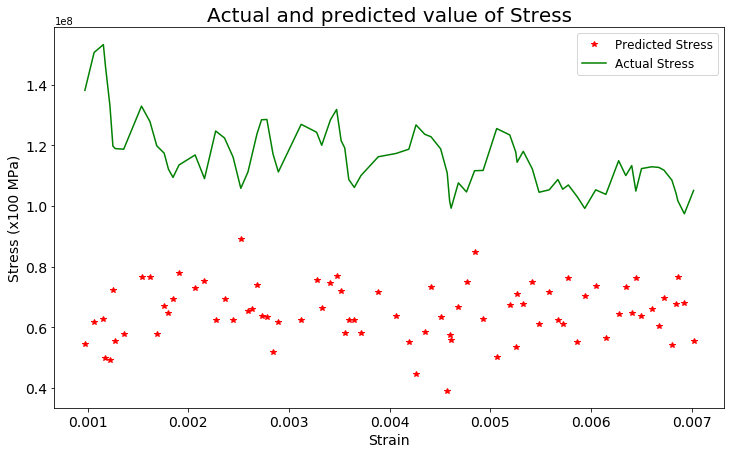

In [18]:
#print(hist.history)
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']

predicted_stress = []
l = []
for i in range(len(files)):
    image = images[i]
    image = np.expand_dims(image, axis=0)
    k = (model.predict(image))*y
    l.append(k[0][0])
    
    
plt.figure(figsize=(12,7))

plt.xlabel("Strain",fontsize = 14)
plt.ylabel("Stress (x100 MPa)",fontsize = 14)

j = np.array(labels["strain"][0:750])
plt.plot( j,l[670:750], 'r*', label='Predicted Stress')
k = np.array(labels["stress"][670:750])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(j,k,"g",label = "Actual Stress")
plt.legend(prop={"size":12})
plt.title('Actual and predicted value of Stress',fontsize = 20)




<Figure size 720x720 with 0 Axes>

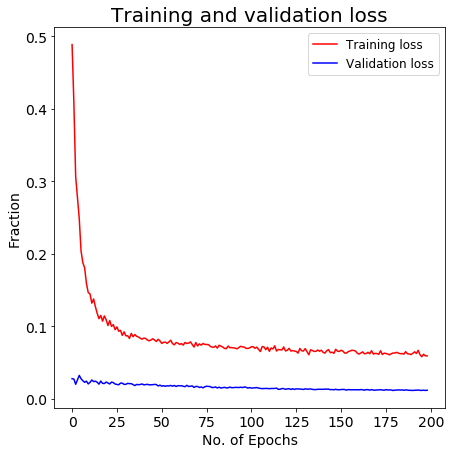

<Figure size 720x720 with 0 Axes>

In [19]:
#print(hist.history)
train_loss = hist.history['loss'][1:]
val_loss   = hist.history['val_loss'][1:]

plt.figure(figsize=(7,7))
epochs = range(len(val_loss))
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.xlabel("No. of Epochs",fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Fraction",fontsize = 14)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss',fontsize = 20)
plt.legend(prop={"size":12})

plt.figure(figsize=(10,10))

In [18]:
model.save("model_24_5.h5")

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(k,l)
p = '%.3f' % r2

In [40]:
plt.savefig("S.png")

<Figure size 432x288 with 0 Axes>

In [47]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 115, 115, 24)      408       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 36)        3492      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 48)        15600     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

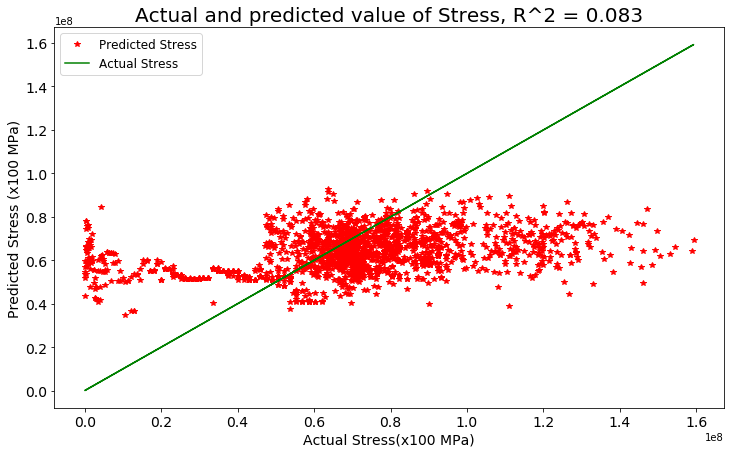

In [48]:
l = []
for i in range(len(files)):
    image = images[i]
    image = np.expand_dims(image, axis=0)
    k = (model.predict(image))*y
    l.append(k[0][0])
plt.figure(figsize=(12,7))
plt.xlabel("Actual Stress(x100 MPa)",fontsize = 14)
plt.ylabel("Predicted Stress (x100 MPa)",fontsize = 14)

j = np.array(labels["strain"])
k = np.array(labels["stress"])
plt.plot(k,l, 'r*', label='Predicted Stress')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(k,k,"g",label = "Actual Stress")
plt.legend(prop={"size":12})
plt.title('Actual and predicted value of Stress, R^2 = '+str(p),fontsize = 20)
plt.savefig("s.png")